# Land cover mapping use case demonstrator

This Jupyter Notebook demonstrates the Land Cover use case and its tests.

## Environment setup

First, the environment is set up for data processing: load needed libraries, install the `probaV` package

In [1]:
setwd("../src")
source("utils/install-probav.r")
library(probaV)
library(gdalUtils)
library(curl)
library(sf)

Skipping install of 'probaV' from a github remote, the SHA1 (3eb1efbb) has not changed since last install.
  Use `force = TRUE` to force installation
Loading required package: raster
Loading required package: sp
Loading required package: doParallel
Loading required package: foreach
Loading required package: iterators
Loading required package: parallel
Loading required package: rgdal
rgdal: version: 1.2-18, (SVN revision 718)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.4, released 2017/06/23
 Path to GDAL shared files: /usr/share/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.8.0, 6 March 2012, [PJ_VERSION: 480]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-3 
Loading required package: gdalUtils
Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Linking to GEOS 3.4.2, GDAL 2.1.4, proj.4 4.8.0


## Test Case 8.1: System environment

Check whether the environment is virtualised

In [2]:
system("systemd-detect-virt", TRUE)

[1] "kvm"

## Test Case 11.1: Tutorial on processing

The tutorial on the `ProbaV` package used to process the data is available on http://jorndallinga.github.io/. Test to make sure it is up:

In [3]:
grepl("<title>ProbaV</title>", rawToChar(curl_fetch_memory("http://jorndallinga.github.io/")$content))

[1] TRUE

## Test Case 4.1: Script documentation

The processing scripts are available at https://github.com/GreatEmerald/master-classification/tree/master/src. Checking the number of comments in the scripts:

In [31]:
(ScriptFiles = list.files("../src", glob2rx("*.r"), full.names=TRUE, recursive=TRUE))

[1] "../src/classification/classify-cmeans.r"
 [2] "../src/classification/classify-mgb.r"   
 [3] "../src/classification/classify-nn.r"    
 [4] "../src/classification/classify-rf.r"    
 [5] "../src/classification/predict-cmeans.r" 
 [6] "../src/classification/predict-dummy.r"  
 [7] "../src/classification/predict-mgb.r"    
 [8] "../src/classification/predict-nn.r"     
 [9] "../src/classification/predict-rf.r"     
[10] "../src/elevation/dem-merge.r"           
[11] "../src/elevation/get-dem.r"             
[12] "../src/elevation/process-eudem.r"       
[13] "../src/extra/cloud_filter.r"            
[14] "../src/extra/observations.r"            
[15] "../src/extra/predict-mgb-br.r"          
[16] "../src/extra/predict-nn-pure.r"         
[17] "../src/main.r"                          
[18] "../src/optical/apply-timeseries-mask.r" 
[19] "../src/optical/calc-indices.r"          
[20] "../src/optical/clean-builtin.r"         
[21] "../src/optical/clean-timeseries.r"      
[22] "../src/optical/composite-probav.r"      
[23] "../src/optical/get-harmonics.r"         
[24] "../src/test-harmonics.r"                
[25] "../src/utils/GetProbaVQCMask.r"         
[26] "../src/utils/accuracy-statistics.r"     
[27] "../src/utils/dem-statistics.r"          
[28] "../src/utils/install-probav.r"          
[29] "../src/utils/load-data.r"               
[30] "../src/utils/raster-utils.r"            
[31] "../src/utils/set-temp-path.r"           
[32] "../src/validation/merge-data.r"         
[33] "../src/validation/plot-errors.r"        
[34] "../src/validation/process-csv.r"        
[35] "../src/validation/remove-nas.r"         
[36] "../src/validation/simplify-cci.r"       
[37] "../src/validation/visualise-harmonics.r"

In [32]:
ScriptContent = character()
for (i in 1:length(ScriptFiles))
{
    ScriptContent = c(ScriptContent, readLines(ScriptFiles[i]))
}
CommentLocations = grep("#", ScriptContent)
length(CommentLocations) / length(ScriptContent)

Warning message in readLines(ScriptFiles[i]):
“incomplete final line found on '../src/utils/accuracy-statistics.r'”

[1] 0.1796842

## Test Case 5.1: access to the reference data

Check whether the reference data is available:

In [6]:
system("ls -l ../data", TRUE)

[1] "total 10036"                                                                                         
 [2] "-rw-rw-r--. 1 greatemerald eodata      20132 Nov  2  2016 LICENSE.TXT"                               
 [3] "-rw-rw-r--. 1 greatemerald eodata        320 Mar 22 13:39 aoi.dbf"                                   
 [4] "-rw-rw-r--. 1 greatemerald eodata        236 Mar 22 13:39 aoi.shp"                                   
 [5] "-rw-rw-r--. 1 greatemerald eodata        108 Mar 22 13:39 aoi.shx"                                   
 [6] "-rw-r--r--. 1 gem-rserv    gem-rserv  229324 Mar 21  2017 errors-stat-cmeans-unoptimised.csv"        
 [7] "-rw-r--r--. 1 gem-rserv    gem-rserv  208968 Mar 21  2017 errors-stat-cmeans.csv"                    
 [8] "-rw-r--r--. 1 gem-rserv    gem-rserv  205951 Mar 21  2017 errors-stat-dummy.csv"                     
 [9] "-rw-r--r--. 1 gem-rserv    gem-rserv  192780 Mar 21  2017 errors-stat-neuralnetworks-unoptimised.csv"
[10] "-rw-r--r--. 1 gem-rserv    gem-rserv  194331 Mar 21  2017 errors-stat-neuralnetworks.csv"            
[11] "-rw-rw-r--. 1 gem-rserv    gem-rserv  206880 Mar 21  2017 errors-stat-randomforest-unoptimised.csv"  
[12] "-rw-rw-r--. 1 gem-rserv    gem-rserv  206974 Mar 21  2017 errors-stat-randomforest.csv"              
[13] "-rw-rw-r--. 1 greatemerald eodata      27675 Mar 22 13:39 groundtruth.csv"                           
[14] "-rw-rw-r--. 1 greatemerald gem-rserv 6594560 Nov  2  2016 groundtruth.sqlite"                        
[15] "-rw-rw-r--. 1 gem-rserv    gem-rserv     395 Dec  6  2016 midtermsummary.csv"                        
[16] "-rw-rw-r--. 1 greatemerald eodata        143 Mar 22 13:39 probavgrid.prj"                            
[17] "-rw-rw-r--. 1 greatemerald eodata        257 Mar 22 13:39 probavgrid.qpj"                            
[18] "-rw-rw-r--. 1 greatemerald eodata    1774180 Mar 22 13:39 probavgrid.shp"                            
[19] "-rw-rw-r--. 1 greatemerald eodata     161380 Mar 22 13:39 probavgrid.shx"                            
[20] "-rw-rw-r--. 1 greatemerald eodata       2341 Mar 22 13:39 readme.md"                                 
[21] "-rw-rw-r--. 1 gem-rserv    gem-rserv     646 Mar 10  2017 stat-cmeans-pure-unoptimised.csv"          
[22] "-rw-rw-r--. 1 gem-rserv    gem-rserv     645 Mar 10  2017 stat-cmeans-pure.csv"                      
[23] "-rw-rw-r--. 1 gem-rserv    gem-rserv     661 Mar 21  2017 stat-cmeans-unoptimised.csv"               
[24] "-rw-rw-r--. 1 gem-rserv    gem-rserv     658 Mar 21  2017 stat-cmeans.csv"                           
[25] "-rw-rw-r--. 1 gem-rserv    gem-rserv     649 Mar  2  2017 stat-dummy-pure.csv"                       
[26] "-rw-rw-r--. 1 gem-rserv    gem-rserv     661 Mar 21  2017 stat-dummy.csv"                            
[27] "-rw-rw-r--. 1 gem-rserv    gem-rserv     642 Feb 23  2017 stat-gradientboost-unoptimised.csv"        
[28] "-rw-rw-r--. 1 gem-rserv    gem-rserv     646 Mar  2  2017 stat-gradientboost.csv"                    
[29] "-rw-rw-r--. 1 gem-rserv    gem-rserv     661 Mar 10  2017 stat-neuralnetworks-pure-unoptimised.csv"  
[30] "-rw-rw-r--. 1 gem-rserv    gem-rserv     656 Mar 10  2017 stat-neuralnetworks-pure.csv"              
[31] "-rw-rw-r--. 1 greatemerald gem-rserv     659 Mar 21  2017 stat-neuralnetworks-unoptimised.csv"       
[32] "-rw-rw-r--. 1 gem-rserv    gem-rserv     663 Mar 21  2017 stat-neuralnetworks.csv"                   
[33] "-rw-rw-r--. 1 gem-rserv    gem-rserv     644 Mar 10  2017 stat-randomforest-pure-unoptimised.csv"    
[34] "-rw-rw-r--. 1 gem-rserv    gem-rserv     646 Mar 10  2017 stat-randomforest-pure.csv"                
[35] "-rw-rw-r--. 1 gem-rserv    gem-rserv     655 Mar 21  2017 stat-randomforest-unoptimised.csv"         
[36] "-rw-rw-r--. 1 gem-rserv    gem-rserv     655 Mar 21  2017 stat-randomforest.csv"                     
[37] "-rw-rw-r--. 1 greatemerald gem-rserv    1339 Mar 14  2017 timing.csv"                                
[38] 

In [7]:
AOIFile = "../data/aoi.shp"

In [8]:
system(paste("file", AOIFile), TRUE)

[1] "../data/aoi.shp: ESRI Shapefile version 1000 length 118 type Polygon"

In [9]:
ogrinfo(AOIFile)

[1] "INFO: Open of `../data/aoi.shp'"                
[2] "      using driver `ESRI Shapefile' successful."
[3] "1: aoi (Polygon)"

In [10]:
AOI = st_read(AOIFile)

Reading layer `aoi' from data source `/home/greatemerald/shared/master-classification/data/aoi.shp' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 1 field
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: 19.9995 ymin: 55.0005 xmax: 29.9995 ymax: 65.0005
epsg (SRID):    NA
proj4string:    NA


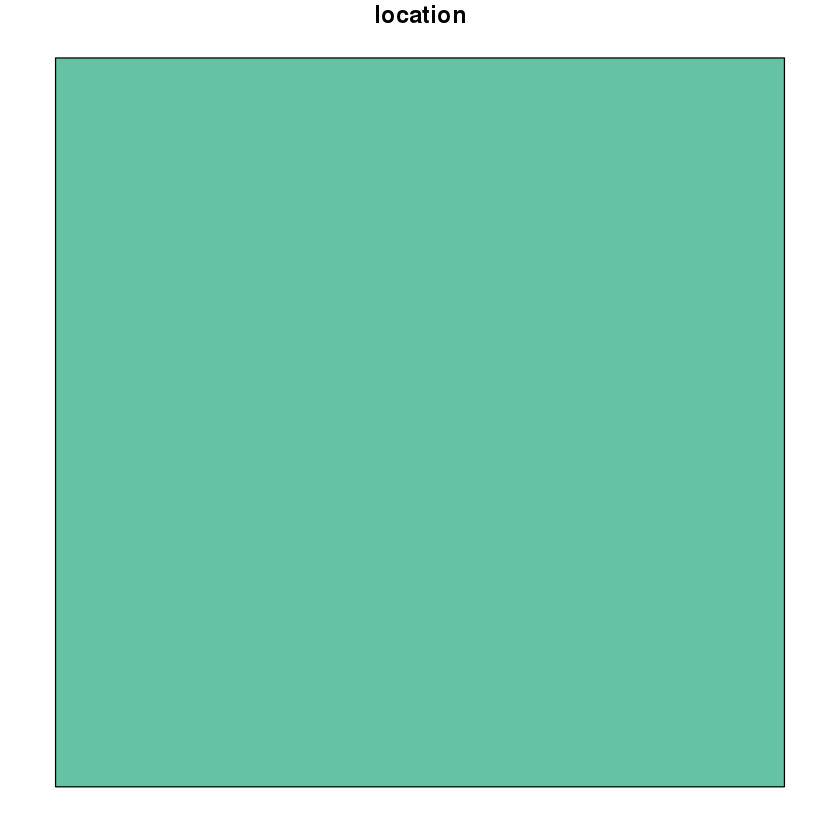

In [11]:
plot(AOI)

## Test case 5.2: Access to the PROBA-V data

In [12]:
system("ls /data/MTDA/TIFFDERIVED/PROBAV_L3_S5_TOC_100M/2018", TRUE)

[1] "20180101" "20180106" "20180111" "20180116" "20180121" "20180126"
 [7] "20180201" "20180206" "20180211" "20180216" "20180221" "20180226"
[13] "20180301" "20180306" "20180311" "20180316" "20180321"

In [13]:
SampleFile = "/data/MTDA/TIFFDERIVED/PROBAV_L3_S5_TOC_100M/2017/20170101/PROBAV_S5_TOC_20170101_100M_V101/PROBAV_S5_TOC_X20Y01_20170101_100M_V101_RADIOMETRY.tif"

In [14]:
system(paste("file", SampleFile), TRUE)

[1] "/data/MTDA/TIFFDERIVED/PROBAV_L3_S5_TOC_100M/2017/20170101/PROBAV_S5_TOC_20170101_100M_V101/PROBAV_S5_TOC_X20Y01_20170101_100M_V101_RADIOMETRY.tif: TIFF image data, little-endian"

In [15]:
gdalinfo(SampleFile)

[1] "Driver: GTiff/GeoTIFF"                                                                                                                                    
 [2] "Files: /data/MTDA/TIFFDERIVED/PROBAV_L3_S5_TOC_100M/2017/20170101/PROBAV_S5_TOC_20170101_100M_V101/PROBAV_S5_TOC_X20Y01_20170101_100M_V101_RADIOMETRY.tif"
 [3] "Size is 10080, 10080"                                                                                                                                     
 [4] "Coordinate System is:"                                                                                                                                    
 [5] "GEOGCS[\"WGS 84\","                                                                                                                                       
 [6] "    DATUM[\"WGS_1984\","                                                                                                                                  
 [7] "        SPHEROID[\"WGS 84\",6378137,298.257223563,"                                                                                                       
 [8] "            AUTHORITY[\"EPSG\",\"7030\"]],"                                                                                                               
 [9] "        AUTHORITY[\"EPSG\",\"6326\"]],"                                                                                                                   
[10] "    PRIMEM[\"Greenwich\",0],"                                                                                                                             
[11] "    UNIT[\"degree\",0.0174532925199433],"                                                                                                                 
[12] "    AUTHORITY[\"EPSG\",\"4326\"]]"                                                                                                                        
[13] "Origin = (19.999503968253968,65.000496031746025)"                                                                                                         
[14] "Pixel Size = (0.000992063492063,-0.000992063492063)"                                                                                                      
[15] "Metadata:"                                                                                                                                                
[16] "  AREA_OR_POINT=Area"                                                                                                                                     
[17] "  C=frmt_various.html#SAGA"                                                                                                                               
[18] "  TIFFTAG_COPYRIGHT=VITO"                                                                                                                                 
[19] "Image Structure Metadata:"                                                                                                                                
[20] "  COMPRESSION=DEFLATE"                                                                                                                                    
[21] "  INTERLEAVE=BAND"                                                                                                                                        
[22] "Corner Coordinates:"                                                                                                                                      
[23] "Upper Left  (  19.9995040,  65.0004960) ( 19d59'58.21\"E, 65d 0' 1.79\"N)"                                                                                
[24] "Lower Left  (  19.9995040,  55.0004960) ( 19d59'58.21\"E, 55d 0' 1.79\"N)"                                                                                
[25] "Upper Right (  29.9995040,  65.0004960) ( 29d59'58.21\"E, 65d 0' 1.79\"N)"                                                         

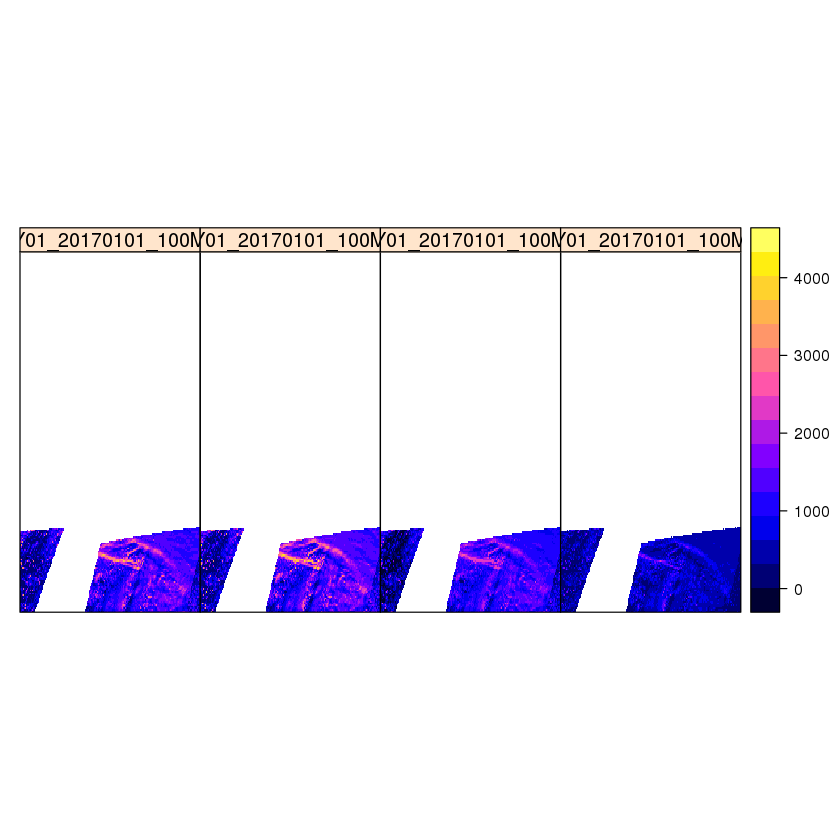

In [17]:
spplot(brick(SampleFile))

## Test Case 12.1: Data pre-processing

Check whether the preprocessed data is available: cloud-free NDVI time series for the PROBA-V archive.

[1] "PROBAV_S5_TOC_X20Y01_20140311_100M_V101_NDVI_sm.tif"        
  [2] "PROBAV_S5_TOC_X20Y01_20140311_100M_V101_NDVI_sm.tif.aux.xml"
  [3] "PROBAV_S5_TOC_X20Y01_20140316_100M_V101_NDVI_sm.tif"        
  [4] "PROBAV_S5_TOC_X20Y01_20140316_100M_V101_NDVI_sm.tif.aux.xml"
  [5] "PROBAV_S5_TOC_X20Y01_20140321_100M_V101_NDVI_sm.tif"        
  [6] "PROBAV_S5_TOC_X20Y01_20140321_100M_V101_NDVI_sm.tif.aux.xml"
  [7] "PROBAV_S5_TOC_X20Y01_20140326_100M_V101_NDVI_sm.tif"        
  [8] "PROBAV_S5_TOC_X20Y01_20140326_100M_V101_NDVI_sm.tif.aux.xml"
  [9] "PROBAV_S5_TOC_X20Y01_20140401_100M_V101_NDVI_sm.tif"        
 [10] "PROBAV_S5_TOC_X20Y01_20140401_100M_V101_NDVI_sm.tif.aux.xml"
 [11] "PROBAV_S5_TOC_X20Y01_20140406_100M_V101_NDVI_sm.tif"        
 [12] "PROBAV_S5_TOC_X20Y01_20140406_100M_V101_NDVI_sm.tif.aux.xml"
 [13] "PROBAV_S5_TOC_X20Y01_20140411_100M_V101_NDVI_sm.tif"        
 [14] "PROBAV_S5_TOC_X20Y01_20140411_100M_V101_NDVI_sm.tif.aux.xml"
 [15] "PROBAV_S5_TOC_X20Y01_20140416_100M_V101_NDVI_sm.tif"        
 [16] "PROBAV_S5_TOC_X20Y01_20140416_100M_V101_NDVI_sm.tif.aux.xml"
 [17] "PROBAV_S5_TOC_X20Y01_20140421_100M_V101_NDVI_sm.tif"        
 [18] "PROBAV_S5_TOC_X20Y01_20140421_100M_V101_NDVI_sm.tif.aux.xml"
 [19] "PROBAV_S5_TOC_X20Y01_20140426_100M_V101_NDVI_sm.tif"        
 [20] "PROBAV_S5_TOC_X20Y01_20140426_100M_V101_NDVI_sm.tif.aux.xml"
 [21] "PROBAV_S5_TOC_X20Y01_20140501_100M_V101_NDVI_sm.tif"        
 [22] "PROBAV_S5_TOC_X20Y01_20140501_100M_V101_NDVI_sm.tif.aux.xml"
 [23] "PROBAV_S5_TOC_X20Y01_20140506_100M_V101_NDVI_sm.tif"        
 [24] "PROBAV_S5_TOC_X20Y01_20140506_100M_V101_NDVI_sm.tif.aux.xml"
 [25] "PROBAV_S5_TOC_X20Y01_20140511_100M_V101_NDVI_sm.tif"        
 [26] "PROBAV_S5_TOC_X20Y01_20140511_100M_V101_NDVI_sm.tif.aux.xml"
 [27] "PROBAV_S5_TOC_X20Y01_20140516_100M_V101_NDVI_sm.tif"        
 [28] "PROBAV_S5_TOC_X20Y01_20140516_100M_V101_NDVI_sm.tif.aux.xml"
 [29] "PROBAV_S5_TOC_X20Y01_20140521_100M_V101_NDVI_sm.tif"        
 [30] "PROBAV_S5_TOC_X20Y01_20140521_100M_V101_NDVI_sm.tif.aux.xml"
 [31] "PROBAV_S5_TOC_X20Y01_20140526_100M_V101_NDVI_sm.tif"        
 [32] "PROBAV_S5_TOC_X20Y01_20140526_100M_V101_NDVI_sm.tif.aux.xml"
 [33] "PROBAV_S5_TOC_X20Y01_20140601_100M_V101_NDVI_sm.tif"        
 [34] "PROBAV_S5_TOC_X20Y01_20140601_100M_V101_NDVI_sm.tif.aux.xml"
 [35] "PROBAV_S5_TOC_X20Y01_20140606_100M_V101_NDVI_sm.tif"        
 [36] "PROBAV_S5_TOC_X20Y01_20140606_100M_V101_NDVI_sm.tif.aux.xml"
 [37] "PROBAV_S5_TOC_X20Y01_20140611_100M_V101_NDVI_sm.tif"        
 [38] "PROBAV_S5_TOC_X20Y01_20140611_100M_V101_NDVI_sm.tif.aux.xml"
 [39] "PROBAV_S5_TOC_X20Y01_20140616_100M_V101_NDVI_sm.tif"        
 [40] "PROBAV_S5_TOC_X20Y01_20140616_100M_V101_NDVI_sm.tif.aux.xml"
 [41] "PROBAV_S5_TOC_X20Y01_20140621_100M_V101_NDVI_sm.tif"        
 [42] "PROBAV_S5_TOC_X20Y01_20140621_100M_V101_NDVI_sm.tif.aux.xml"
 [43] "PROBAV_S5_TOC_X20Y01_20140626_100M_V101_NDVI_sm.tif"        
 [44] "PROBAV_S5_TOC_X20Y01_20140626_100M_V101_NDVI_sm.tif.aux.xml"
 [45] "PROBAV_S5_TOC_X20Y01_20140701_100M_V101_NDVI_sm.tif"        
 [46] "PROBAV_S5_TOC_X20Y01_20140701_100M_V101_NDVI_sm.tif.aux.xml"
 [47] "PROBAV_S5_TOC_X20Y01_20140706_100M_V101_NDVI_sm.tif"        
 [48] "PROBAV_S5_TOC_X20Y01_20140706_100M_V101_NDVI_sm.tif.aux.xml"
 [49] "PROBAV_S5_TOC_X20Y01_20140711_100M_V101_NDVI_sm.tif"        
 [50] "PROBAV_S5_TOC_X20Y01_20140711_100M_V101_NDVI_sm.tif.aux.xml"
 [51] "PROBAV_S5_TOC_X20Y01_20140716_100M_V101_NDVI_sm.tif"        
 [52] "PROBAV_S5_TOC_X20Y01_20140716_100M_V101_NDVI_sm.tif.aux.xml"
 [53] "PROBAV_S5_TOC_X20Y01_20140721_100M_V101_NDVI_sm.tif"        
 [54] "PROBAV_S5_TOC_X20Y01_20140721_100M_V101_NDVI_sm.tif.aux.xml"
 [55] "PROBAV_S5_TOC_X20Y01_20140726_100M_V101_NDVI_sm.tif"        
 [56] "PROBAV_S5_TOC_X20Y01_20140726_100M_V101_NDVI_sm.tif.aux.xml"
 [57] "PROBAV_S5_TOC_X20Y01_20140801_100M_V101_NDVI_sm.tif"        
 [58] "PROBAV_S5_TOC_X20Y01_20140801_100M_V101_NDVI_sm.tif.aux.xml"
 [59] "PROBAV_S5_TOC_X20Y01_20140806_100M_V101_NDVI_sm.tif

[1] "Driver: GTiff/GeoTIFF"                                                                                                
 [2] "Files: ../../userdata/master-classification/cleaned/ndvi//PROBAV_S5_TOC_X20Y01_20170126_100M_V101_NDVI_sm.tif"        
 [3] "       ../../userdata/master-classification/cleaned/ndvi//PROBAV_S5_TOC_X20Y01_20170126_100M_V101_NDVI_sm.tif.aux.xml"
 [4] "Size is 10080, 10080"                                                                                                 
 [5] "Coordinate System is:"                                                                                                
 [6] "GEOGCS[\"WGS 84\","                                                                                                   
 [7] "    DATUM[\"WGS_1984\","                                                                                              
 [8] "        SPHEROID[\"WGS 84\",6378137,298.257223563,"                                                                   
 [9] "            AUTHORITY[\"EPSG\",\"7030\"]],"                                                                           
[10] "        AUTHORITY[\"EPSG\",\"6326\"]],"                                                                               
[11] "    PRIMEM[\"Greenwich\",0],"                                                                                         
[12] "    UNIT[\"degree\",0.0174532925199433],"                                                                             
[13] "    AUTHORITY[\"EPSG\",\"4326\"]]"                                                                                    
[14] "Origin = (19.999503967999999,65.000496032000001)"                                                                     
[15] "Pixel Size = (0.000992063492063,-0.000992063492063)"                                                                  
[16] "Metadata:"                                                                                                            
[17] "  AREA_OR_POINT=Area"                                                                                                 
[18] "Image Structure Metadata:"                                                                                            
[19] "  COMPRESSION=DEFLATE"                                                                                                
[20] "  INTERLEAVE=BAND"                                                                                                    
[21] "Corner Coordinates:"                                                                                                  
[22] "Upper Left  (  19.9995040,  65.0004960) ( 19d59'58.21\"E, 65d 0' 1.79\"N)"                                            
[23] "Lower Left  (  19.9995040,  55.0004960) ( 19d59'58.21\"E, 55d 0' 1.79\"N)"                                            
[24] "Upper Right (  29.9995040,  65.0004960) ( 29d59'58.21\"E, 65d 0' 1.79\"N)"                                            
[25] "Lower Right (  29.9995040,  55.0004960) ( 29d59'58.21\"E, 55d 0' 1.79\"N)"                                            
[26] "Center      (  24.9995040,  60.0004960) ( 24d59'58.21\"E, 60d 0' 1.79\"N)"                                            
[27] "Band 1 Block=10080x1 Type=Float32, ColorInterp=Gray"                                                                  
[28] "  Min=-0.080 Max=0.920 "                                                                                              
[29] "  Minimum=-0.080, Maximum=0.920, Mean=nan, StdDev=nan"                                                                
[30] "  NoData Value=-3.39999999999999996e+38"                                                                              
[31] "  Metadata:"                                                                                                          
[32] "    STATISTICS_MAXIMUM=0.9200000166893"                                                                               
[

Warning message in .hist1(x, maxpixels = maxpixels, main = main, plot = plot, ...):
“0% of the raster cells were used. 100000 values used.”

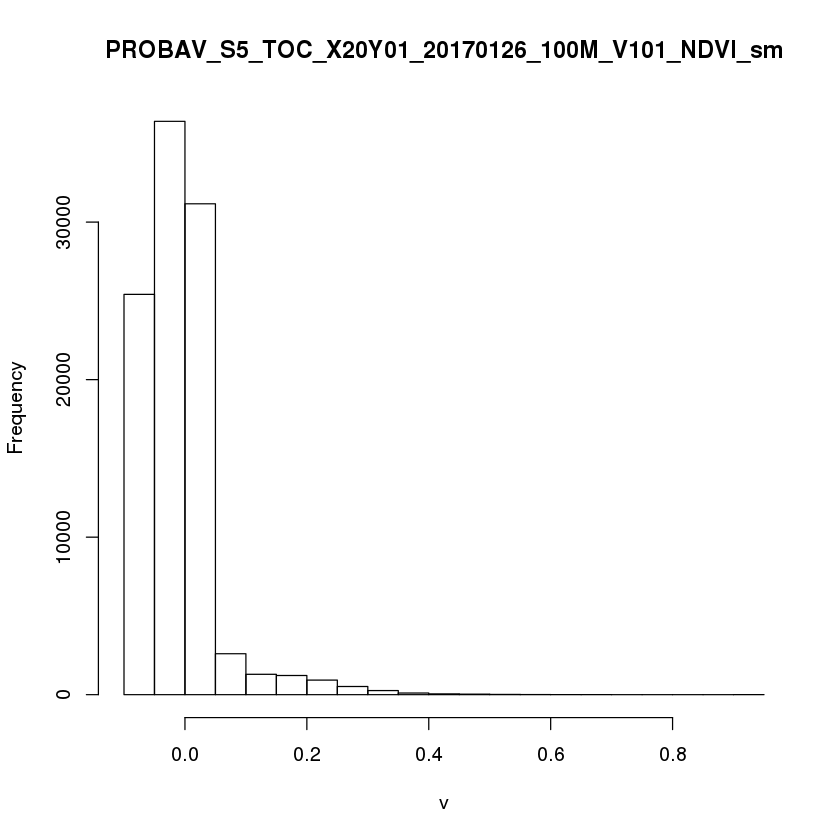

In [22]:
CleanNDVIDir = "../../userdata/master-classification/cleaned/ndvi/"
system(paste("ls", CleanNDVIDir), TRUE)
CleanNDVIFiles = list.files(CleanNDVIDir, glob2rx("*.tif"), full.names=TRUE)
PreprocessedExampleFile = CleanNDVIFiles[length(CleanNDVIFiles)]
gdalinfo(PreprocessedExampleFile)
hist(raster(PreprocessedExampleFile))

## Test Cases 6.1: Processing and 17.1: Modularity

In order to have the scripts for deriving temporal statistics run in a reasonable amount of time, a small subset is defined and preprocessed data is used.

In [3]:
xmin = 27
xmax = 27.5
ymin = 58
ymax = 58.5
Extent = extent(xmin, xmax, ymin, ymax)
TempDir = "../../userdata/tmp"

In [19]:
OutputDir = "../../userdata/master-classification/harmonics-subset/"

unlink(OutputDir, TRUE)
dir.create(OutputDir)

Cores = 4
RowsPerThread = 1
source("optical/get-harmonics.r")


 building main vrt, layers: 208
 building main vrt, layers: 208[1] "layers: 208 dates: blocks: 4 cores: 4"

Number of output layers: 8 
list()
[1] "../../userdata/master-classification/harmonics-subset/harmonic-coefficients.tif"


Checking to make sure all the input files exist...
Checking gdal_installation...
Checking gdal_installation...
Scanning for GDAL installations...
Checking the gdalUtils_gdalPath option...
GDAL version 2.1.4
GDAL command being used: "/usr/bin/gdalbuildvrt" -input_file_list "/tmp/Rtmpxo7L7k/file4bfc6e390483.txt" "/tmp/Rtmpxo7L7k/file4bfc79431c9d.vrt" 
Checking gdal_installation...
Scanning for GDAL installations...
Checking the gdalUtils_gdalPath option...
GDAL version 2.1.4
GDAL command being used: "/usr/bin/gdal_translate" -ot "Float32" -of "ENVI" "/tmp/Rtmpxo7L7k/file4bfc79431c9d.vrt" "../../userdata/master-classification/harmonics-subset/harmonic-coefficients.tif"
Input file size is 504, 5040...10...20...30...40...50...60...70...80...90...100 - done.


   user  system elapsed 
602.580   4.892 312.635 


Check output files

In [20]:
HarmonicMetricsFile = file.path(OutputDir, "phase-amplitude.tif")
system(paste("file", HarmonicMetricsFile), TRUE)
gdalinfo(HarmonicMetricsFile)

[1] "../../userdata/master-classification/harmonics-subset//phase-amplitude.tif: TIFF image data, little-endian"

[1] "Driver: GTiff/GeoTIFF"                                                            
 [2] "Files: ../../userdata/master-classification/harmonics-subset//phase-amplitude.tif"
 [3] "Size is 504, 504"                                                                 
 [4] "Coordinate System is:"                                                            
 [5] "GEOGCS[\"WGS 84\","                                                               
 [6] "    DATUM[\"WGS_1984\","                                                          
 [7] "        SPHEROID[\"WGS 84\",6378137,298.257223563,"                               
 [8] "            AUTHORITY[\"EPSG\",\"7030\"]],"                                       
 [9] "        AUTHORITY[\"EPSG\",\"6326\"]],"                                           
[10] "    PRIMEM[\"Greenwich\",0],"                                                     
[11] "    UNIT[\"degree\",0.0174532925199433],"                                         
[12] "    AUTHORITY[\"EPSG\",\"4326\"]]"                                                
[13] "Origin = (27.000000000000000,58.500000000000000)"                                 
[14] "Pixel Size = (0.000992063492063,-0.000992063492063)"                              
[15] "Metadata:"                                                                        
[16] "  AREA_OR_POINT=Area"                                                             
[17] "Image Structure Metadata:"                                                        
[18] "  COMPRESSION=DEFLATE"                                                            
[19] "  INTERLEAVE=PIXEL"                                                               
[20] "Corner Coordinates:"                                                              
[21] "Upper Left  (  27.0000000,  58.5000000) ( 27d 0' 0.00\"E, 58d30' 0.00\"N)"        
[22] "Lower Left  (  27.0000000,  58.0000000) ( 27d 0' 0.00\"E, 58d 0' 0.00\"N)"        
[23] "Upper Right (  27.5000000,  58.5000000) ( 27d30' 0.00\"E, 58d30' 0.00\"N)"        
[24] "Lower Right (  27.5000000,  58.0000000) ( 27d30' 0.00\"E, 58d 0' 0.00\"N)"        
[25] "Center      (  27.2500000,  58.2500000) ( 27d15' 0.00\"E, 58d15' 0.00\"N)"        
[26] "Band 1 Block=504x1 Type=Float32, ColorInterp=Gray"                                
[27] "  Min=-0.078 Max=0.826 "                                                          
[28] "  Minimum=-0.078, Maximum=0.826, Mean=0.541, StdDev=0.252"                        
[29] "  NoData Value=-3.39999999999999996e+38"                                          
[30] "  Metadata:"                                                                      
[31] "    STATISTICS_MAXIMUM=0.82581132650375"                                          
[32] "    STATISTICS_MEAN=0.54111782042804"                                             
[33] "    STATISTICS_MINIMUM=-0.078437498363201"                                        
[34] "    STATISTICS_STDDEV=0.25178540994957"                                           
[35] "Band 2 Block=504x1 Type=Float32, ColorInterp=Undefined"                           
[36] "  Min=0.000 Max=6.283 "                                                           
[37] "  Minimum=0.000, Maximum=6.283, Mean=3.446, StdDev=0.422"                         
[38] "  NoData Value=-3.39999999999999996e+38"                                          
[39] "  Metadata:"                                                                      
[40] "    STATISTICS_MAXIMUM=6.2830263886034"                                           
[41] "    STATISTICS_MEAN=3.4457219044596"                                              
[42] "    STATISTICS_MINIMUM=0.00021850540773534"                                       
[43] "    STATISTICS_STDDEV=0.42171516417523"                                           
[44] "Band 3 Block=504x1 Type=Float32, ColorInterp=Undefined"                           
[45] "  Min=0.000 Max=688.440 "                                                      

Plot the resulting time series phase and amplitude information

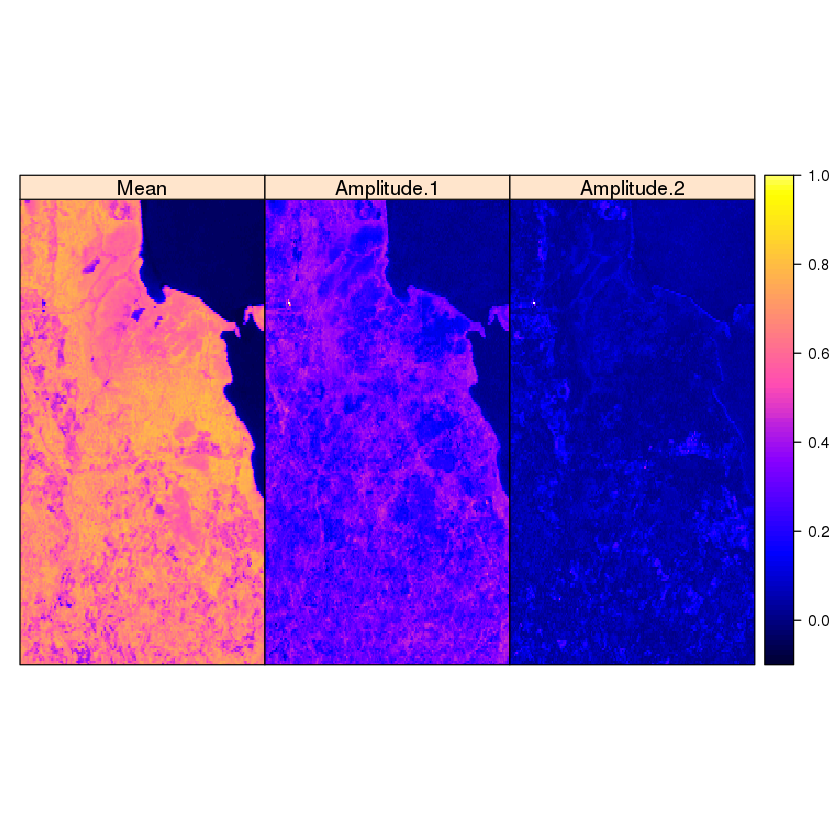

In [21]:
HarmonicMetrics = brick(HarmonicMetricsFile)
names(HarmonicMetrics) = c("Mean", "Phase 1", "Amplitude 1", "Phase 2", "Amplitude 2")
spplot(HarmonicMetrics, c(1, 3, 5), at=seq(-0.1, 1, length.out=100))

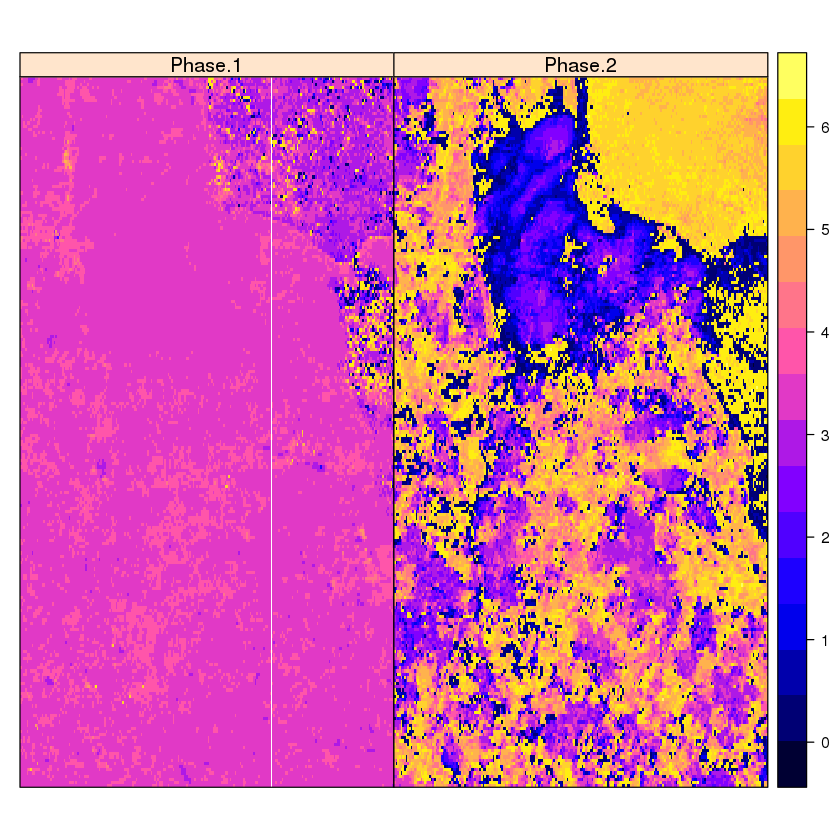

In [22]:
spplot(HarmonicMetrics, c(2, 4))

# Test Case 2.1: Single custom class of interest

Random Forest is used to predict the fraction of a single class of interest over the area of interest.

In [4]:
CovariateDir = "../../userdata/master-classification/covariates"
OutputDir = "../../userdata/master-classification/predictions-subset/"
unlink(OutputDir, TRUE)
dir.create(OutputDir)

ClassesToPredict = "wetland"
source("classification/predict-rf.r")

[1] "Starting prediction phase 1..."
[1] "wetland"
  |======================================================================| 100%

   user  system elapsed 
 34.560   2.330   2.859 


[1] "../../userdata/master-classification/predictions-subset//randomforest.tif"

[1] "../../userdata/master-classification/predictions-subset//randomforest.tif: TIFF image data, little-endian"

[1] "Driver: GTiff/GeoTIFF"                                                           
 [2] "Files: ../../userdata/master-classification/predictions-subset//randomforest.tif"
 [3] "Size is 504, 504"                                                                
 [4] "Coordinate System is:"                                                           
 [5] "GEOGCS[\"WGS 84\","                                                              
 [6] "    DATUM[\"WGS_1984\","                                                         
 [7] "        SPHEROID[\"WGS 84\",6378137,298.257223563,"                              
 [8] "            AUTHORITY[\"EPSG\",\"7030\"]],"                                      
 [9] "        AUTHORITY[\"EPSG\",\"6326\"]],"                                          
[10] "    PRIMEM[\"Greenwich\",0],"                                                    
[11] "    UNIT[\"degree\",0.0174532925199433],"                                        
[12] "    AUTHORITY[\"EPSG\",\"4326\"]]"                                               
[13] "Origin = (27.000496031492101,58.499503968507902)"                                
[14] "Pixel Size = (0.000992063492063,-0.000992063492063)"                             
[15] "Metadata:"                                                                       
[16] "  AREA_OR_POINT=Area"                                                            
[17] "Image Structure Metadata:"                                                       
[18] "  COMPRESSION=DEFLATE"                                                           
[19] "  INTERLEAVE=BAND"                                                               
[20] "Corner Coordinates:"                                                             
[21] "Upper Left  (  27.0004960,  58.4995040) ( 27d 0' 1.79\"E, 58d29'58.21\"N)"       
[22] "Lower Left  (  27.0004960,  57.9995040) ( 27d 0' 1.79\"E, 57d59'58.21\"N)"       
[23] "Upper Right (  27.5004960,  58.4995040) ( 27d30' 1.79\"E, 58d29'58.21\"N)"       
[24] "Lower Right (  27.5004960,  57.9995040) ( 27d30' 1.79\"E, 57d59'58.21\"N)"       
[25] "Center      (  27.2504960,  58.2495040) ( 27d15' 1.79\"E, 58d14'58.21\"N)"       
[26] "Band 1 Block=504x16 Type=Byte, ColorInterp=Gray"                                 
[27] "  Min=0.000 Max=90.000 "                                                         
[28] "  Minimum=0.000, Maximum=90.000, Mean=nan, StdDev=nan"                           
[29] "  NoData Value=255"                                                              
[30] "  Metadata:"                                                                     
[31] "    STATISTICS_MAXIMUM=90"                                                       
[32] "    STATISTICS_MEAN=nan"                                                         
[33] "    STATISTICS_MINIMUM=0"                                                        
[34] "    STATISTICS_STDDEV=nan"

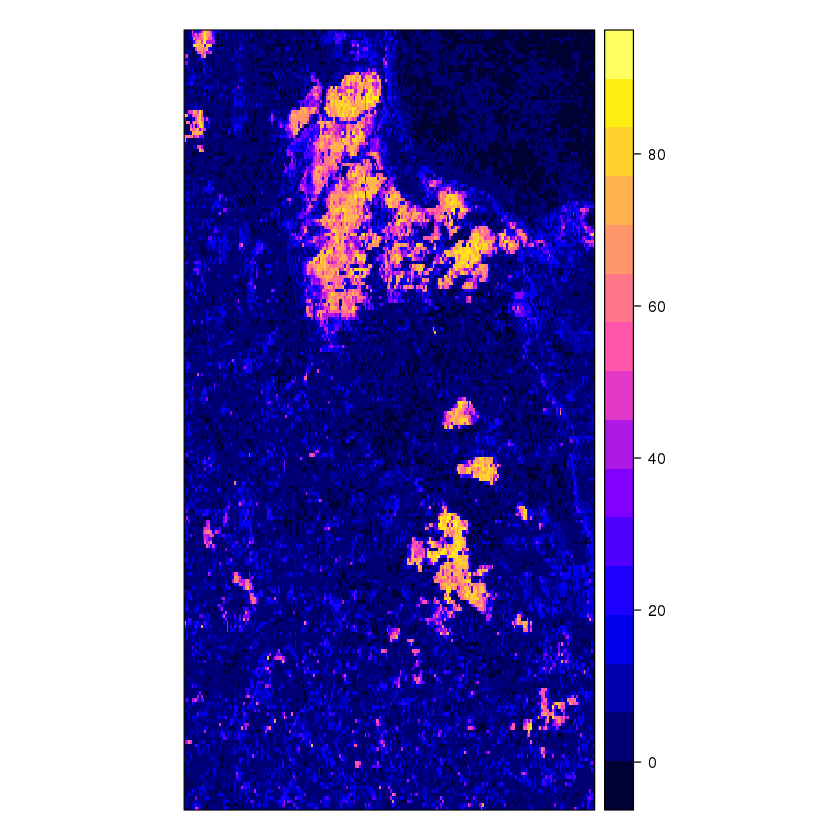

In [6]:
RFPredictionsFile = file.path(OutputDir, "randomforest.tif")
system(paste("ls", RFPredictionsFile), TRUE)
system(paste("file", RFPredictionsFile), TRUE)
gdalinfo(RFPredictionsFile)
RFPredictions = raster(RFPredictionsFile)
names(RFPredictions) = ClassesToPredict
spplot(RFPredictions)

## Test Cases 7.1: Data Storage and 10.1: Land Cover fraction files

First, the classification process needs to be run for the specified area of interest. We use Random Forest for this demonstration.

In [8]:
CovariateDir = "../../userdata/master-classification/covariates"
OutputDir = "../../userdata/master-classification/predictions-subset/"
ClassesToPredict = GetValidationNames()
unlink(OutputDir, TRUE)
dir.create(OutputDir)
source("classification/predict-rf.r")

[1] "Starting prediction phase 1..."
[1] "cropland"
  |======================================================================| 100%

   user  system elapsed 
 34.748   2.800   3.301 
[1] "dec.trees"
  |======================================================================| 100%

   user  system elapsed 
 38.999   1.685   3.486 
[1] "evgr.trees"
  |======================================================================| 100%

   user  system elapsed 
 40.152   2.281   3.836 
[1] "shrubland"
  |======================================================================| 100%

   user  system elapsed 
 39.827   2.624   3.830 
[1] "grassland"
  |======================================================================| 100%

   user  system elapsed 
 43.490   3.128   3.948 
[1] "bare.soil"
  |======================================================================| 100%

   user  system elapsed 
 36.173   2.873   3.525 
[1] "wetland"
  |================================================================

In [9]:
RFPredictionsFile = file.path(OutputDir, "randomforest.tif")
system(paste("ls", RFPredictionsFile), TRUE)
system(paste("file", RFPredictionsFile), TRUE)
gdalinfo(RFPredictionsFile)

[1] "../../userdata/master-classification/predictions-subset//randomforest.tif"

[1] "../../userdata/master-classification/predictions-subset//randomforest.tif: TIFF image data, little-endian"

[1] "Driver: GTiff/GeoTIFF"                                                           
  [2] "Files: ../../userdata/master-classification/predictions-subset//randomforest.tif"
  [3] "Size is 504, 504"                                                                
  [4] "Coordinate System is:"                                                           
  [5] "GEOGCS[\"WGS 84\","                                                              
  [6] "    DATUM[\"WGS_1984\","                                                         
  [7] "        SPHEROID[\"WGS 84\",6378137,298.257223563,"                              
  [8] "            AUTHORITY[\"EPSG\",\"7030\"]],"                                      
  [9] "        AUTHORITY[\"EPSG\",\"6326\"]],"                                          
 [10] "    PRIMEM[\"Greenwich\",0],"                                                    
 [11] "    UNIT[\"degree\",0.0174532925199433],"                                        
 [12] "    AUTHORITY[\"EPSG\",\"4326\"]]"                                               
 [13] "Origin = (27.000496031492101,58.499503968507902)"                                
 [14] "Pixel Size = (0.000992063492063,-0.000992063492063)"                             
 [15] "Metadata:"                                                                       
 [16] "  AREA_OR_POINT=Area"                                                            
 [17] "Image Structure Metadata:"                                                       
 [18] "  COMPRESSION=DEFLATE"                                                           
 [19] "  INTERLEAVE=PIXEL"                                                              
 [20] "Corner Coordinates:"                                                             
 [21] "Upper Left  (  27.0004960,  58.4995040) ( 27d 0' 1.79\"E, 58d29'58.21\"N)"       
 [22] "Lower Left  (  27.0004960,  57.9995040) ( 27d 0' 1.79\"E, 57d59'58.21\"N)"       
 [23] "Upper Right (  27.5004960,  58.4995040) ( 27d30' 1.79\"E, 58d29'58.21\"N)"       
 [24] "Lower Right (  27.5004960,  57.9995040) ( 27d30' 1.79\"E, 57d59'58.21\"N)"       
 [25] "Center      (  27.2504960,  58.2495040) ( 27d15' 1.79\"E, 58d14'58.21\"N)"       
 [26] "Band 1 Block=504x1 Type=Byte, ColorInterp=Gray"                                  
 [27] "  Min=0.000 Max=78.000 "                                                         
 [28] "  Minimum=0.000, Maximum=78.000, Mean=11.825, StdDev=17.402"                     
 [29] "  NoData Value=255"                                                              
 [30] "  Metadata:"                                                                     
 [31] "    STATISTICS_MAXIMUM=78"                                                       
 [32] "    STATISTICS_MEAN=11.824676398337"                                             
 [33] "    STATISTICS_MINIMUM=0"                                                        
 [34] "    STATISTICS_STDDEV=17.401986098818"                                           
 [35] "Band 2 Block=504x1 Type=Byte, ColorInterp=Undefined"                             
 [36] "  Min=0.000 Max=69.000 "                                                         
 [37] "  Minimum=0.000, Maximum=69.000, Mean=18.021, StdDev=15.846"                     
 [38] "  NoData Value=255"                                                              
 [39] "  Metadata:"                                                                     
 [40] "    STATISTICS_MAXIMUM=69"                                                       
 [41] "    STATISTICS_MEAN=18.021191578483"                                             
 [42] "    STATISTICS_MINIMUM=0"                                                        
 [43] "    STATISTICS_STDDEV=15.846022437317"                                           
 [44] "Band 3 Block=504x1 Type=Byte, ColorInterp=Undefined"                             
 [45] "  Min=0.000 Max=76.000 "                                                       

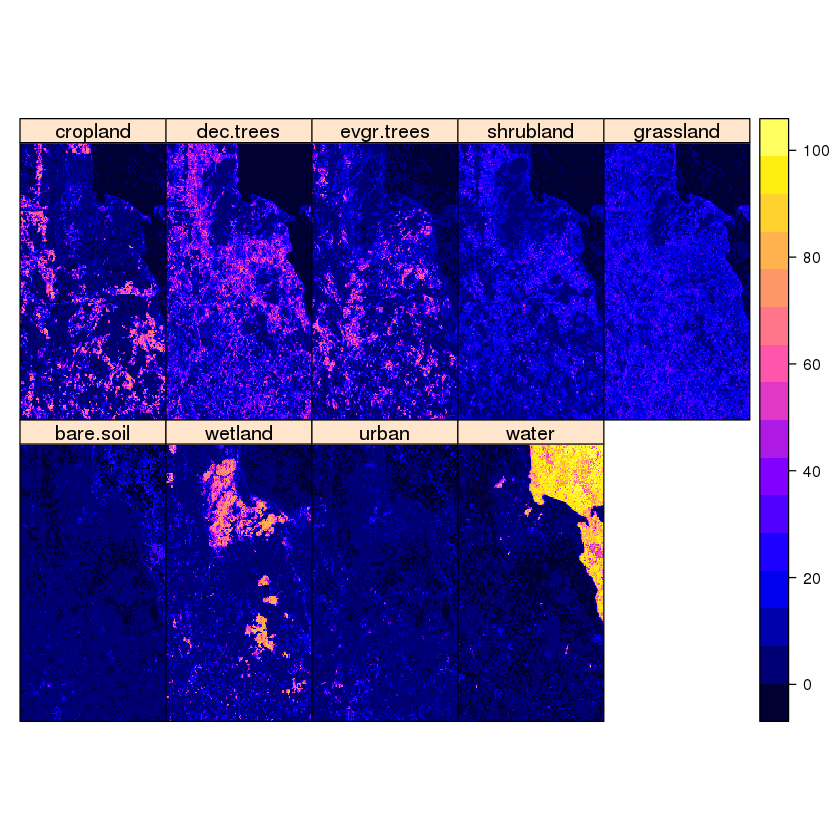

In [10]:
RFPredictions = brick(RFPredictionsFile)
names(RFPredictions) = GetValidationNames()
spplot(RFPredictions)

## Test Cases 9.1: Land Cover files and 2.2: Complex classes of interest

Create hard classification out of the fuzzy one by retaining the highest proportion in a pixel:

In [11]:
RFPredictionHard = which.max(RFPredictions)
RFPredictionHard = writeRaster(RFPredictionHard, filename=file.path(OutputDir, "randomforest-hard.tif"), datatype="INT1U")

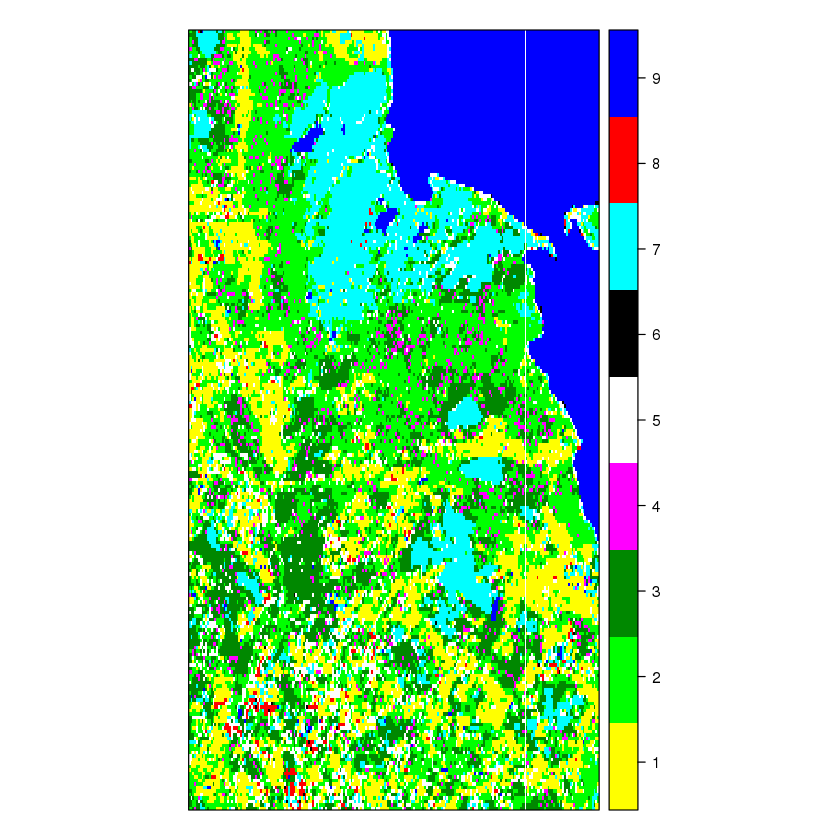

In [12]:
spplot(RFPredictionHard, cuts=8, col.regions=c("#FFFF00FF", "#00FF00FF", "#008800FF", "#FF00FFFF", "#FFFFFFFF", "#000000FF",
                                       "#00FFFFFF", "#FF0000FF", "#0000FFFF"))

Specify custom thresholds for the water and urban classes (show a pixel that is >20% water/urban as water/urban):

In [ ]:
HardenWithUrban = function(values)
{
    if (values[9] > 20)
        return(9)
    if (values[8] > 20)
        return(8)
    return(which.max(values))
}

RFPredictionUrban = calc(RFPredictions, HardenWithUrban, filename=file.path(OutputDir, "randomforest-urban.tif"),
                         datatype="INT1U", progress="text", overwrite=TRUE)

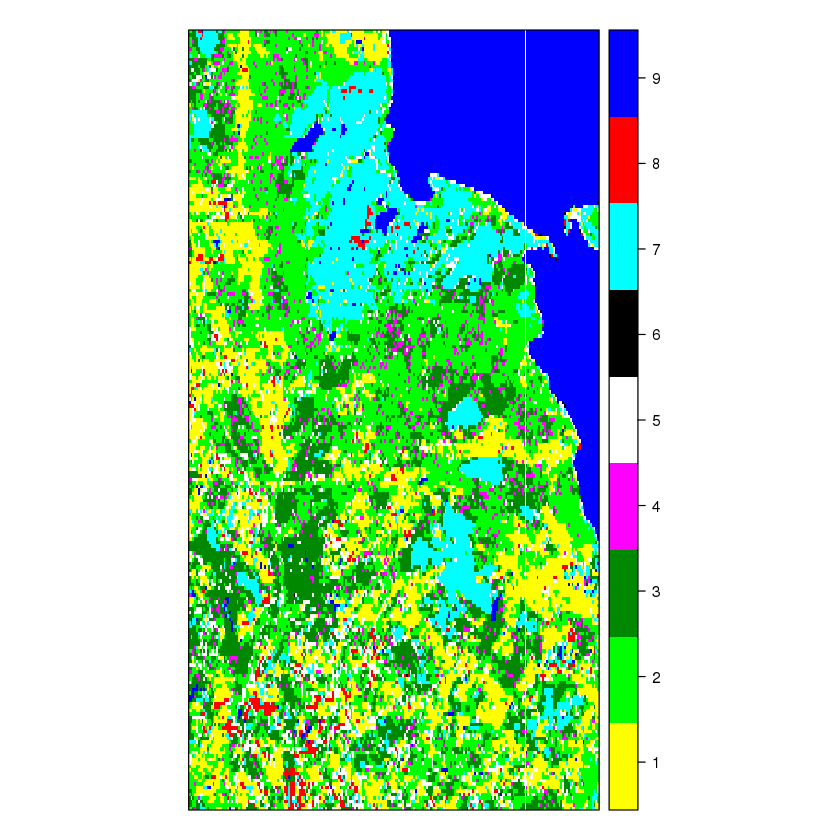

In [17]:
spplot(RFPredictionUrban, cuts=8, col.regions=c("#FFFF00FF", "#00FF00FF", "#008800FF", "#FF00FFFF", "#FFFFFFFF",
                                                "#000000FF","#00FFFFFF", "#FF0000FF", "#0000FFFF"))

## Test Case 16.2: Manual quality check

This step involves opening the output files made above in QGIS to see how the spatial patterns look like compared to a basemap. X2go is used to access QGIS from the VM side.

## Test Cases 13.1: Multi-source Data Integration and 18.1: Service scalability

Showing the effects of variable importance when covariates are not present. First, run the service with all the variables on a single class:

[1] "Starting prediction phase 1..."
[1] "wetland"
[1] 510.2789
       red        nir       blue       swir       lswi      slope        tpi 
 224.01200  109.78435  130.34913   79.26149  131.41199  264.17728   25.70106 
 mean.ndvi     phase1 amplitude1     phase2 amplitude2 
 292.10456   22.48858   67.29323  198.28069   18.32999 
  |======================================================================| 100%

   user  system elapsed 
 34.941   2.289   2.658 


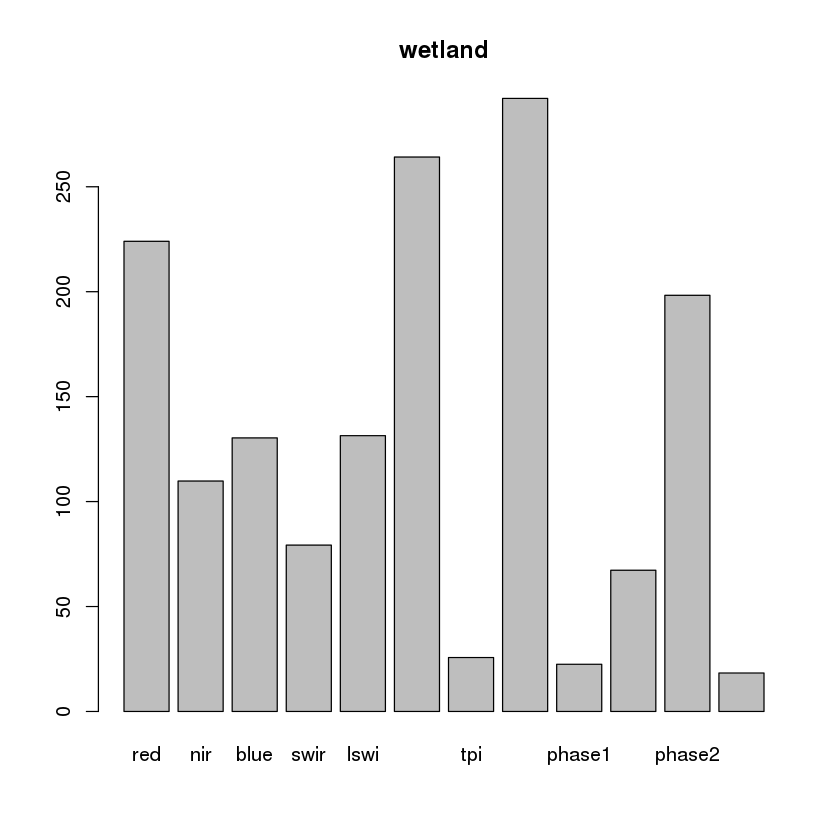

In [24]:
CovariateDir = "../../userdata/master-classification/covariates"
OutputDir = "../../userdata/master-classification/predictions-subset/"
GetVariableImportance = TRUE
ClassesToPredict = "wetland"
unlink(OutputDir, TRUE)
dir.create(OutputDir)
source("classification/predict-rf.r")

[1] "../../userdata/master-classification/predictions-subset//randomforest.tif"

[1] "../../userdata/master-classification/predictions-subset//randomforest.tif: TIFF image data, little-endian"

[1] "Driver: GTiff/GeoTIFF"                                                           
 [2] "Files: ../../userdata/master-classification/predictions-subset//randomforest.tif"
 [3] "Size is 504, 504"                                                                
 [4] "Coordinate System is:"                                                           
 [5] "GEOGCS[\"WGS 84\","                                                              
 [6] "    DATUM[\"WGS_1984\","                                                         
 [7] "        SPHEROID[\"WGS 84\",6378137,298.257223563,"                              
 [8] "            AUTHORITY[\"EPSG\",\"7030\"]],"                                      
 [9] "        AUTHORITY[\"EPSG\",\"6326\"]],"                                          
[10] "    PRIMEM[\"Greenwich\",0],"                                                    
[11] "    UNIT[\"degree\",0.0174532925199433],"                                        
[12] "    AUTHORITY[\"EPSG\",\"4326\"]]"                                               
[13] "Origin = (27.000496031492101,58.499503968507902)"                                
[14] "Pixel Size = (0.000992063492063,-0.000992063492063)"                             
[15] "Metadata:"                                                                       
[16] "  AREA_OR_POINT=Area"                                                            
[17] "Image Structure Metadata:"                                                       
[18] "  COMPRESSION=DEFLATE"                                                           
[19] "  INTERLEAVE=BAND"                                                               
[20] "Corner Coordinates:"                                                             
[21] "Upper Left  (  27.0004960,  58.4995040) ( 27d 0' 1.79\"E, 58d29'58.21\"N)"       
[22] "Lower Left  (  27.0004960,  57.9995040) ( 27d 0' 1.79\"E, 57d59'58.21\"N)"       
[23] "Upper Right (  27.5004960,  58.4995040) ( 27d30' 1.79\"E, 58d29'58.21\"N)"       
[24] "Lower Right (  27.5004960,  57.9995040) ( 27d30' 1.79\"E, 57d59'58.21\"N)"       
[25] "Center      (  27.2504960,  58.2495040) ( 27d15' 1.79\"E, 58d14'58.21\"N)"       
[26] "Band 1 Block=504x16 Type=Byte, ColorInterp=Gray"                                 
[27] "  Min=1.000 Max=86.000 "                                                         
[28] "  Minimum=1.000, Maximum=86.000, Mean=nan, StdDev=nan"                           
[29] "  NoData Value=255"                                                              
[30] "  Metadata:"                                                                     
[31] "    STATISTICS_MAXIMUM=86"                                                       
[32] "    STATISTICS_MEAN=nan"                                                         
[33] "    STATISTICS_MINIMUM=1"                                                        
[34] "    STATISTICS_STDDEV=nan"

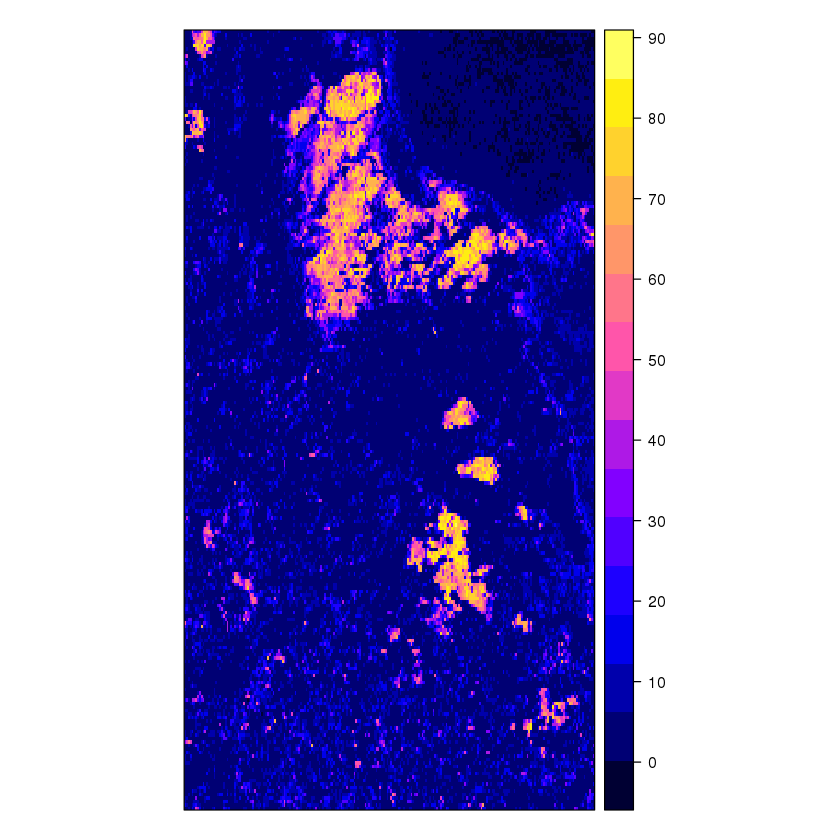

In [27]:
RFPredictionsFile = file.path(OutputDir, "randomforest.tif")
system(paste("ls", RFPredictionsFile), TRUE)
system(paste("file", RFPredictionsFile), TRUE)
gdalinfo(RFPredictionsFile)
RFPredictions = raster(RFPredictionsFile)
spplot(RFPredictions)

Run the same, but excluding all but PROBA-V spectral covariates:

[1] "Starting prediction phase 1..."
[1] "wetland"
[1] 718.8024
     red      nir     blue     swir    osavi     lswi 
315.9156 158.6662 354.9183 113.2162 542.5038 211.3471 
  |======================================================================| 100%

   user  system elapsed 
 39.449   1.869   3.378 


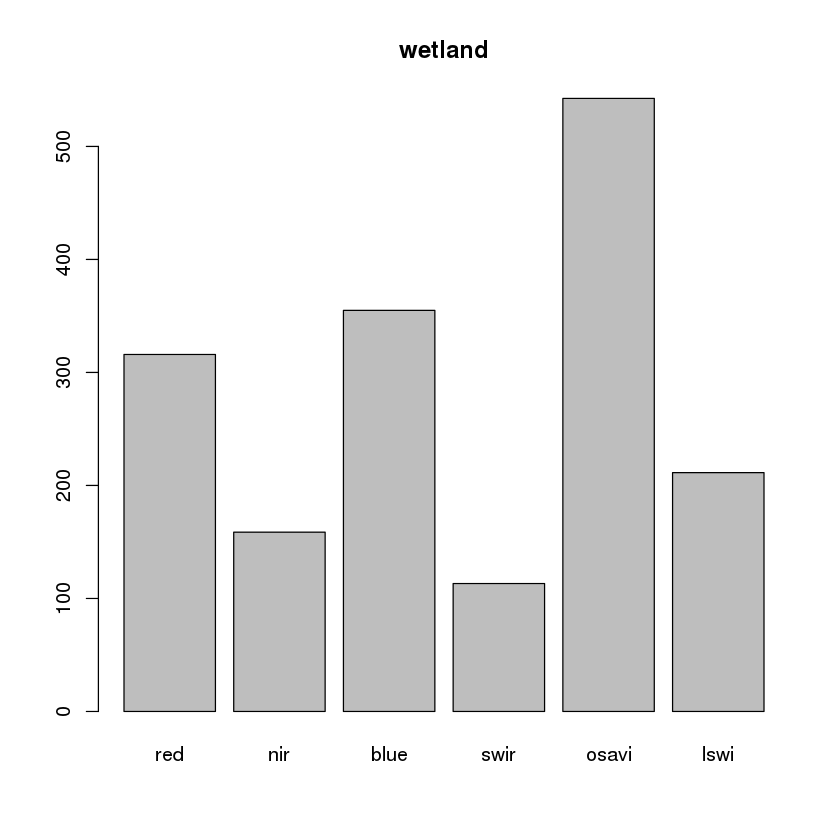

In [25]:
CovariateDir = "../../userdata/master-classification/covariates"
OutputDir = "../../userdata/master-classification/predictions-subset/"
GetVariableImportance = TRUE
ClassesToPredict = "wetland"
Exclude = c("is.water", "height", "slope", "aspect", "tpi", "mean.ndvi", "phase1", "amplitude1", "phase2", "amplitude2")
unlink(OutputDir, TRUE)
dir.create(OutputDir)
source("classification/predict-rf.r")

[1] "../../userdata/master-classification/predictions-subset//randomforest.tif"

[1] "../../userdata/master-classification/predictions-subset//randomforest.tif: TIFF image data, little-endian"

[1] "Driver: GTiff/GeoTIFF"                                                           
 [2] "Files: ../../userdata/master-classification/predictions-subset//randomforest.tif"
 [3] "Size is 504, 504"                                                                
 [4] "Coordinate System is:"                                                           
 [5] "GEOGCS[\"WGS 84\","                                                              
 [6] "    DATUM[\"WGS_1984\","                                                         
 [7] "        SPHEROID[\"WGS 84\",6378137,298.257223563,"                              
 [8] "            AUTHORITY[\"EPSG\",\"7030\"]],"                                      
 [9] "        AUTHORITY[\"EPSG\",\"6326\"]],"                                          
[10] "    PRIMEM[\"Greenwich\",0],"                                                    
[11] "    UNIT[\"degree\",0.0174532925199433],"                                        
[12] "    AUTHORITY[\"EPSG\",\"4326\"]]"                                               
[13] "Origin = (27.000496031492101,58.499503968507902)"                                
[14] "Pixel Size = (0.000992063492063,-0.000992063492063)"                             
[15] "Metadata:"                                                                       
[16] "  AREA_OR_POINT=Area"                                                            
[17] "Image Structure Metadata:"                                                       
[18] "  COMPRESSION=DEFLATE"                                                           
[19] "  INTERLEAVE=BAND"                                                               
[20] "Corner Coordinates:"                                                             
[21] "Upper Left  (  27.0004960,  58.4995040) ( 27d 0' 1.79\"E, 58d29'58.21\"N)"       
[22] "Lower Left  (  27.0004960,  57.9995040) ( 27d 0' 1.79\"E, 57d59'58.21\"N)"       
[23] "Upper Right (  27.5004960,  58.4995040) ( 27d30' 1.79\"E, 58d29'58.21\"N)"       
[24] "Lower Right (  27.5004960,  57.9995040) ( 27d30' 1.79\"E, 57d59'58.21\"N)"       
[25] "Center      (  27.2504960,  58.2495040) ( 27d15' 1.79\"E, 58d14'58.21\"N)"       
[26] "Band 1 Block=504x16 Type=Byte, ColorInterp=Gray"                                 
[27] "  Min=0.000 Max=90.000 "                                                         
[28] "  Minimum=0.000, Maximum=90.000, Mean=nan, StdDev=nan"                           
[29] "  NoData Value=255"                                                              
[30] "  Metadata:"                                                                     
[31] "    STATISTICS_MAXIMUM=90"                                                       
[32] "    STATISTICS_MEAN=nan"                                                         
[33] "    STATISTICS_MINIMUM=0"                                                        
[34] "    STATISTICS_STDDEV=nan"

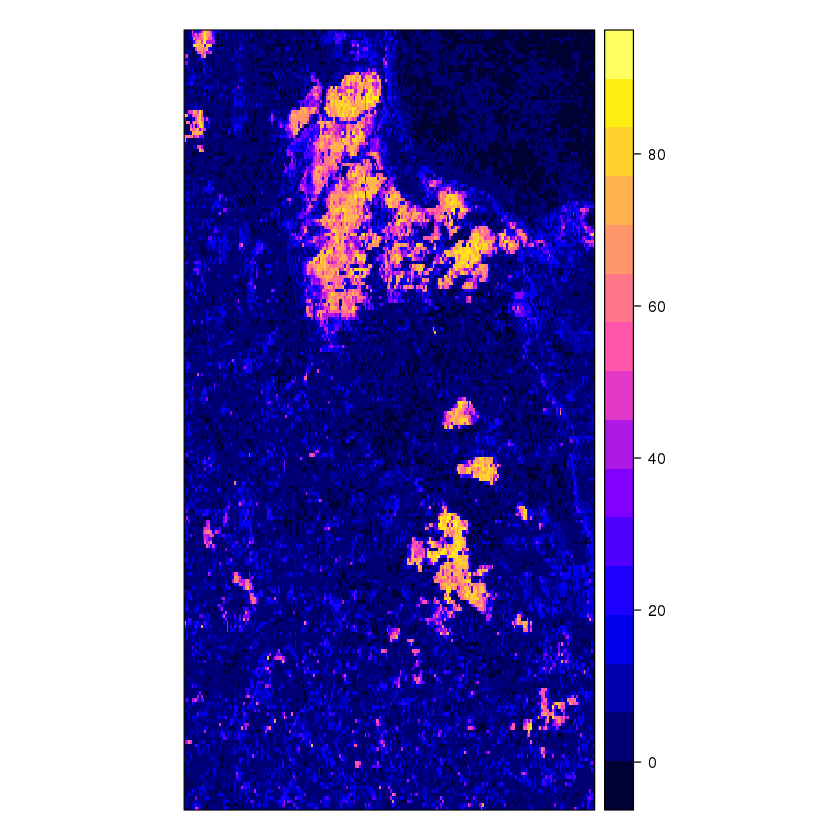

In [6]:
RFPredictionsFile = file.path(OutputDir, "randomforest.tif")
system(paste("ls", RFPredictionsFile), TRUE)
system(paste("file", RFPredictionsFile), TRUE)
gdalinfo(RFPredictionsFile)
RFPredictions = raster(RFPredictionsFile)
spplot(RFPredictions)

## Test Cases 14.1: Processing and 21.1: Service Configurability

Run the service using custom model parameters.

[1] "Starting prediction phase 1..."
[1] "wetland"
[1] 527.0485
       red        nir       blue       swir       lswi      slope        tpi 
168.501201  97.749901 122.335407  68.222063 117.945402 229.211127  16.111562 
 mean.ndvi     phase1 amplitude1     phase2 amplitude2 
246.750393   9.258338  58.587064 184.570411   9.678763 
  |======================================================================| 100%

   user  system elapsed 
 32.049   1.441   2.702 


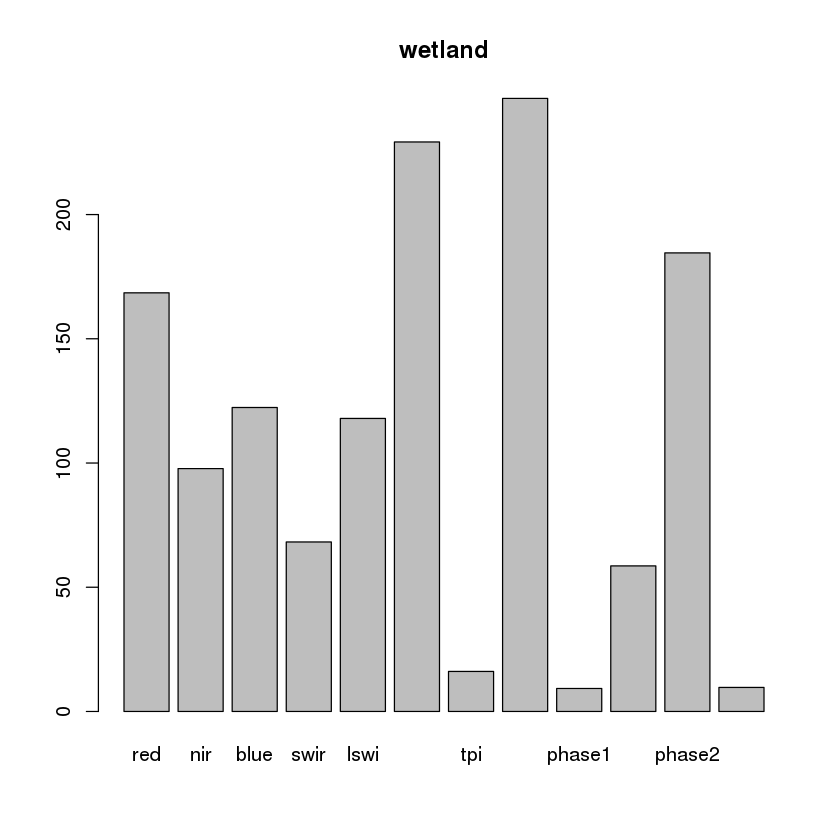

In [26]:
CovariateDir = "../../userdata/master-classification/covariates"
OutputDir = "../../userdata/master-classification/predictions-subset/"
ClassesToPredict = "wetland"
Exclude = c("osavi", "aspect", "is.water", "height")
Alpha = 0.7 # Significance at which to split nodes
MinProp = 0.2 # Lower quantile of the distribution considered for splitting
unlink(OutputDir, TRUE)
dir.create(OutputDir)
source("classification/predict-rf.r")

[1] "../../userdata/master-classification/predictions-subset//randomforest.tif"

[1] "../../userdata/master-classification/predictions-subset//randomforest.tif: TIFF image data, little-endian"

[1] "Driver: GTiff/GeoTIFF"                                                           
 [2] "Files: ../../userdata/master-classification/predictions-subset//randomforest.tif"
 [3] "Size is 504, 504"                                                                
 [4] "Coordinate System is:"                                                           
 [5] "GEOGCS[\"WGS 84\","                                                              
 [6] "    DATUM[\"WGS_1984\","                                                         
 [7] "        SPHEROID[\"WGS 84\",6378137,298.257223563,"                              
 [8] "            AUTHORITY[\"EPSG\",\"7030\"]],"                                      
 [9] "        AUTHORITY[\"EPSG\",\"6326\"]],"                                          
[10] "    PRIMEM[\"Greenwich\",0],"                                                    
[11] "    UNIT[\"degree\",0.0174532925199433],"                                        
[12] "    AUTHORITY[\"EPSG\",\"4326\"]]"                                               
[13] "Origin = (27.000496031492101,58.499503968507902)"                                
[14] "Pixel Size = (0.000992063492063,-0.000992063492063)"                             
[15] "Metadata:"                                                                       
[16] "  AREA_OR_POINT=Area"                                                            
[17] "Image Structure Metadata:"                                                       
[18] "  COMPRESSION=DEFLATE"                                                           
[19] "  INTERLEAVE=BAND"                                                               
[20] "Corner Coordinates:"                                                             
[21] "Upper Left  (  27.0004960,  58.4995040) ( 27d 0' 1.79\"E, 58d29'58.21\"N)"       
[22] "Lower Left  (  27.0004960,  57.9995040) ( 27d 0' 1.79\"E, 57d59'58.21\"N)"       
[23] "Upper Right (  27.5004960,  58.4995040) ( 27d30' 1.79\"E, 58d29'58.21\"N)"       
[24] "Lower Right (  27.5004960,  57.9995040) ( 27d30' 1.79\"E, 57d59'58.21\"N)"       
[25] "Center      (  27.2504960,  58.2495040) ( 27d15' 1.79\"E, 58d14'58.21\"N)"       
[26] "Band 1 Block=504x16 Type=Byte, ColorInterp=Gray"                                 
[27] "  Min=0.000 Max=90.000 "                                                         
[28] "  Minimum=0.000, Maximum=90.000, Mean=nan, StdDev=nan"                           
[29] "  NoData Value=255"                                                              
[30] "  Metadata:"                                                                     
[31] "    STATISTICS_MAXIMUM=90"                                                       
[32] "    STATISTICS_MEAN=nan"                                                         
[33] "    STATISTICS_MINIMUM=0"                                                        
[34] "    STATISTICS_STDDEV=nan"

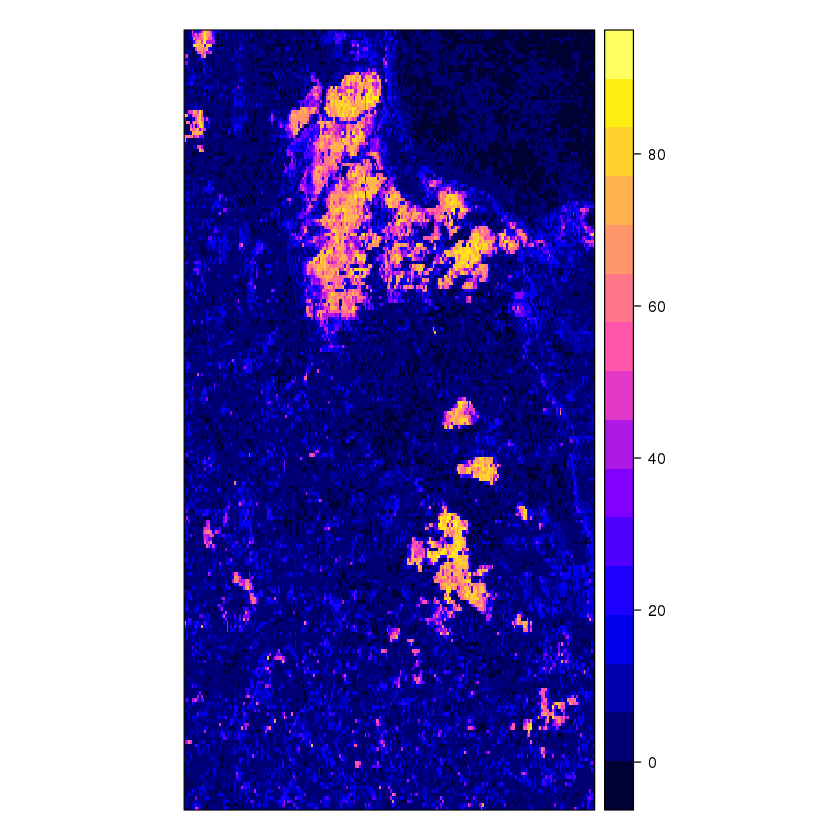

In [6]:
RFPredictionsFile = file.path(OutputDir, "randomforest.tif")
system(paste("ls", RFPredictionsFile), TRUE)
system(paste("file", RFPredictionsFile), TRUE)
gdalinfo(RFPredictionsFile)
RFPredictions = raster(RFPredictionsFile)
spplot(RFPredictions)

## Test Case 20.1: Service performance

Comparison between multithreaded and single-threaded performance. Multithreaded first.
Note: due to a small subset used here, the differences are not as noticeable as when running on a full tile.

In [29]:
CovariateDir = "../../userdata/master-classification/covariates"
OutputDir = "../../userdata/master-classification/predictions-subset/"
rm(ClassesToPredict)
rm(Alpha)
rm(MinProp)
GetVariableImportance = FALSE
Cores = 31
unlink(OutputDir, TRUE)
dir.create(OutputDir)
source("classification/predict-rf.r")

[1] "Starting prediction phase 1..."
[1] "cropland"
  |======================================================================| 100%

   user  system elapsed 
 33.500   3.169   3.348 
[1] "dec.trees"
  |======================================================================| 100%

   user  system elapsed 
 39.329   2.882   3.504 
[1] "evgr.trees"
  |======================================================================| 100%

   user  system elapsed 
 37.346   3.403   3.430 
[1] "shrubland"
  |======================================================================| 100%

   user  system elapsed 
 39.453   3.268   3.533 
[1] "grassland"
  |======================================================================| 100%

   user  system elapsed 
 40.416   3.015   3.798 
[1] "bare.soil"
  |======================================================================| 100%

   user  system elapsed 
 35.363   3.018   3.322 
[1] "wetland"
  |================================================================

In [30]:
CovariateDir = "../../userdata/master-classification/covariates"
OutputDir = "../../userdata/master-classification/predictions-subset/"
Cores = 1
unlink(OutputDir, TRUE)
dir.create(OutputDir)
source("classification/predict-rf.r")

[1] "Starting prediction phase 1..."
[1] "cropland"
  |======================================================================| 100%

   user  system elapsed 
 25.790   1.037  26.833 
[1] "dec.trees"
  |======================================================================| 100%

   user  system elapsed 
 30.206   0.886  31.069 
[1] "evgr.trees"
  |======================================================================| 100%

   user  system elapsed 
 27.851   0.698  28.535 
[1] "shrubland"
  |======================================================================| 100%

   user  system elapsed 
 28.473   0.783  29.253 
[1] "grassland"
  |======================================================================| 100%

   user  system elapsed 
 29.039   0.678  29.718 
[1] "bare.soil"
  |======================================================================| 100%

   user  system elapsed 
 26.452   0.792  27.237 
[1] "wetland"
  |================================================================